In [1]:
import netCDF4     # Note: python is case-sensitive!
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import num2date

In [2]:
data = netCDF4.Dataset('tasAnom_rcp45_land-prob_uk_region_cdf_b6190_30y_ann_20091201-20991130.nc')
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    baseline_period: b6190
    collection: land-prob
    contact: ukcpproject@metoffice.gov.uk, UKCP Team, Met Office Hadley Centre
    creation_date: 2022-05-20T15:44:11
    domain: uk
    frequency: ann
    institution: Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, Devon, EX1 3PB, UK.
    institution_id: MOHC
    prob_data_type: cdf
    project: UKCP18
    references: http://ukclimateprojections.metoffice.gov.uk
    resolution: region
    scenario: rcp45
    source: Probabilistic climate prediction based on family of Met Office Hadley Centre climate models HadCM3, HadRM3 and HadSM3, plus climate models from other climate centres contributing to IPCC AR5 and CFMIP.
    time_slice_type: 30y
    title: UKCP18 probabilistic projections for mean air temperature anomaly at 1.5m (K) for UK land points, for the RCP 4.5 scenario with a 1961-1990 baseline.
    version: v20220425
    Conventio

In [21]:
# Extract the variables
tasAnom = data.variables['tasAnom'][:]  # shape should be (time, region, percentile)
year = data.variables['year'][:]
region = data.variables['region'][:]
percentile = data.variables['percentile'][:]
# Convert time to datetime
time_units = data.variables['year'].units

In [22]:
region_index = 7  # for Region 1
region_name = ''.join(data.variables['geo_region'][region_index, :].astype(str)).strip()

selected_percentiles = [5, 25, 50, 75, 95]
selected_indices = [np.abs(percentile - p).argmin() for p in selected_percentiles]
tasAnom_region_selected = tasAnom[:, region_index, selected_indices]


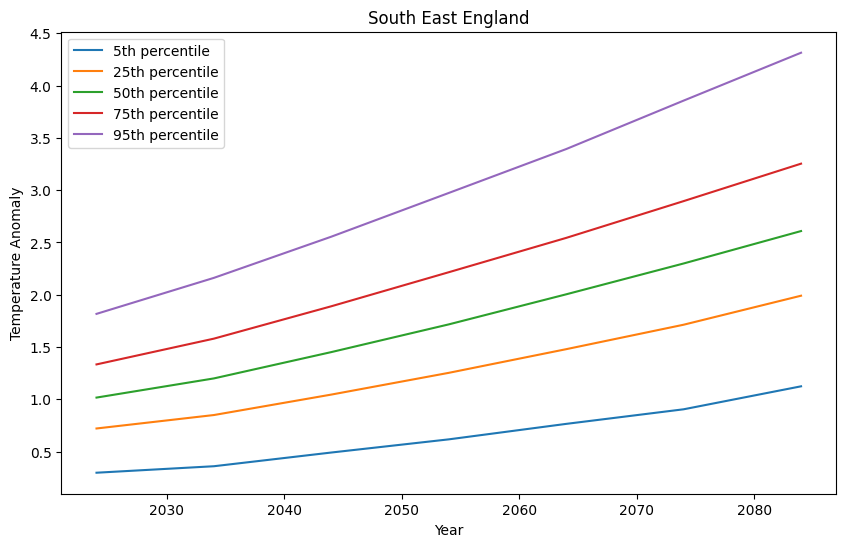

In [23]:
plt.figure(figsize=(10, 6))

# For each selected percentile...
for i, percentile in enumerate(selected_percentiles):
    # Plot the data
    plt.plot(year, tasAnom_region_selected[:, i], label=f'{percentile}th percentile')

plt.title(region_name)
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()

# Show the plot
plt.show()